## Diabetes Prediction

Predict whether a person has diabetes or not.

Dataset Link: https://www.kaggle.com/johndasilva/diabetes

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
data_diabetes = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\Diabetes\Data Wrangling\diabetes.csv')

In [4]:
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
data_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


We can see that there are some columns such as Glucose, BloodPressure, SkinThickness, Insulin and BMI whose minimum values are showing zero. It is not possible to have zero values for such columns. We will analyse these columns in details below.

In [10]:
data_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data_diabetes[data_diabetes['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,6,0,68,41,0,39.0,0.727,41,1
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1
812,1,0,68,35,0,32.0,0.389,22,0
819,5,0,80,32,0,41.0,0.346,37,1
972,6,0,68,41,0,39.0,0.727,41,1
1340,1,0,74,20,23,27.7,0.299,21,0


We can see valuse for glucose column are zero but values for some other columns are avalibale.

In [12]:
data_diabetes[data_diabetes['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,0,145,0,0,0,44.2,0.630,31,1
12,3,80,0,0,0,0.0,0.174,22,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
...,...,...,...,...,...,...,...,...,...
1870,7,105,0,0,0,0.0,0.305,24,0
1881,2,84,0,0,0,0.0,0.304,21,0
1899,0,131,0,0,0,43.2,0.270,26,1
1902,2,74,0,0,0,0.0,0.102,22,0


We can see valuse for BlodPressure column are zero but values for some other columns are avalibale.
Thus it is seen that some patients data is mis represented for either of the following columns : Glucose, BloodPressure, SkinThickness, Insulin and BMI.

In [23]:
df_diabetes = data_diabetes.copy()

In [24]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [25]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [26]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [27]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,1987.0,121.975340,30.632883,44.000,99.000,117.000,141.000,199.00
BloodPressure,1910.0,72.403665,12.227968,24.000,64.000,72.000,80.000,122.00
SkinThickness,1427.0,29.341275,10.802278,7.000,22.000,29.000,36.000,110.00
Insulin,1044.0,153.743295,111.273639,14.000,76.750,126.000,190.000,744.00
BMI,1972.0,32.650101,7.241027,18.200,27.500,32.400,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.470930,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.00


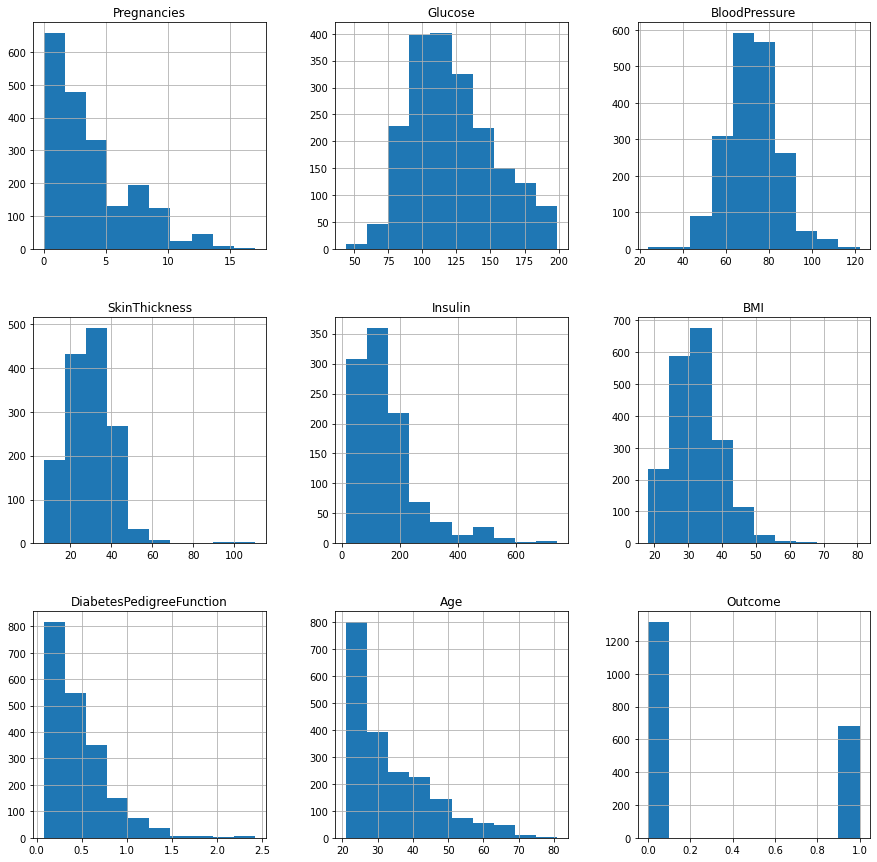

In [31]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
df_diabetes.hist(figsize = (15,15))
plt.show()

In [32]:
# Replacing NaN value by mean, median depending upon distribution
df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].mean(), inplace=True)
df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].mean(), inplace=True)
df_diabetes['SkinThickness'].fillna(df_diabetes['SkinThickness'].median(), inplace=True)
df_diabetes['Insulin'].fillna(df_diabetes['Insulin'].mean(), inplace=True)
df_diabetes['BMI'].fillna(df_diabetes['BMI'].median(), inplace=True)

In [33]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df_diabetes = df_diabetes.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.000000,40.7,0.536,21,0


In [37]:
df_diabetes.to_csv(r'C:\Users\spider\Documents\Springboard\GitHub\Diabetes\Data Wrangling\diabetes_cleaned-data.csv', index = False)